![](http://faithmag.com/sites/default/files/styles/article_full/public/2018-09/titanic2.jpg?h=6521bd5e&itok=H8td6QVv)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [3]:
#Importing Datasets
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
#Check both the datasets
train_data.head()
#train_data.shape
#train_data.describe()
#train_data.isnull().sum()

test_data.head()
#test_data.shape
#test_data.describe()
#test_data.isnull().sum()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Dealing with the missing values

In [4]:
#Feature : Age
train_data['Age'].mean()
test_data['Age'].mean()

30.272590361445783

In [5]:
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)

In [6]:
test_data['Age'].fillna(test_data['Age'].median(), inplace = True)

In [7]:
#Feature : Embarked
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace = True)

In [8]:
#Feature : Fare
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [9]:
#Feature : 'Sex','Embarked'
test_data['Sex_Male'] = (test_data['Sex'] == "male").astype(int)
test_data['Embarked_S'] = (test_data['Embarked'] == "S").astype(int)

In [10]:
#SibSp(Sibling-Spouse) and Parch (Parent-children) will help us to determine the size of the family
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [11]:
#Creating new column Agegroup from Age 
bins= [0,12,20,30,60,100]
labels = ['Children','Teen','Young Adult','Adult','Elder']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)
print (train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [12]:
#Drop the useless columns
useless_cols = ['PassengerId','Name','Ticket','Cabin','SibSp','Parch','Age']
train_data.drop(useless_cols,axis=1,inplace=True)

In [13]:
train_data.head()

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,AgeGroup
0,0,3,male,7.2500,S,1,Young Adult
1,1,1,female,71.2833,C,1,Adult
2,1,3,female,7.9250,S,0,Young Adult
3,1,1,female,53.1000,S,1,Adult
4,0,3,male,8.0500,S,0,Adult


In [14]:
#Drop the useless columns
useless_cols = ['Cabin','Fare']
test_data.drop(useless_cols,axis=1,inplace=True)

In [15]:
#No null values in the train_data
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Fare          0
Embarked      0
FamilySize    0
AgeGroup      0
dtype: int64

In [16]:
#No null values in the test_data
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
Sex_Male       0
Embarked_S     0
dtype: int64

# Visualization of Data

In [17]:
#Correlating each column in the data
train_data.corr()

,Survived,Pclass,Fare,FamilySize
Survived,1.000000,-0.338481,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.549500,0.065997
Fare,0.257307,-0.549500,1.000000,0.217138
FamilySize,0.016639,0.065997,0.217138,1.000000


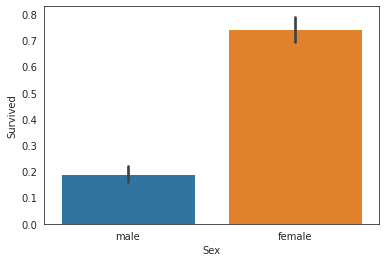

In [18]:
#Survival by Gender
#Female Survival is more than Male
sns.set_style('white')
sns.barplot(train_data['Sex'],train_data['Survived'])


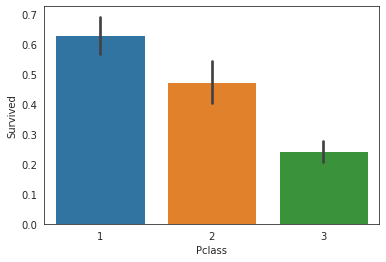

In [19]:
#Survival by Pclass
#Class 1 survival is better than Class 2 and Class 3
sns.barplot(train_data['Pclass'],train_data['Survived'])

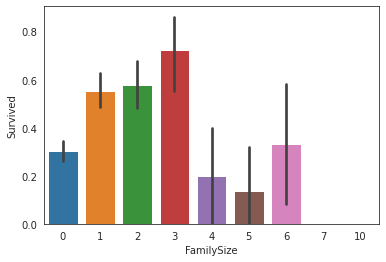

In [20]:
#Survival by FamilySize
#The familysize of 3 has better survival than others
sns.barplot(train_data['FamilySize'],train_data['Survived'])

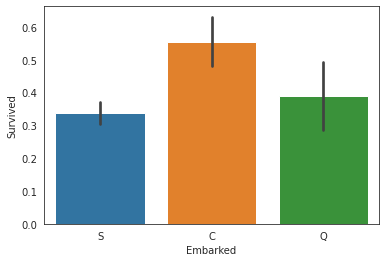

In [21]:
#Survival by Embarked 
#Port of Embarkation: C has better survival
sns.barplot(train_data['Embarked'],train_data['Survived'])

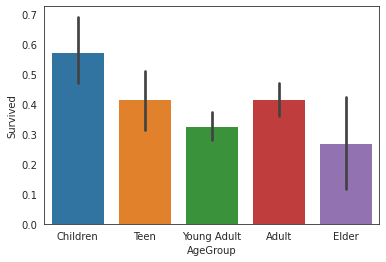

In [22]:
#Survival by Agegroup
#Children Agegroup has better survival rate
sns.barplot(train_data['AgeGroup'],train_data['Survived'])

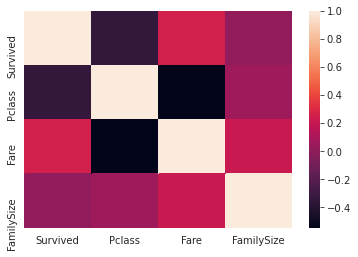

In [23]:
#Visualize relation between each column using heatmap 
sns.heatmap(train_data.corr())

# Applying Machine Learning Models

In [24]:
#Convert Categorical data to Numeric
train_data['Sex'].replace(['male','female'],[0,1],inplace=True)
train_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train_data['AgeGroup'].replace(['Children','Teen','Young Adult','Adult','Elder'],[0,1,2,3,4],inplace=True)

In [25]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [26]:
#Split dataset into train and test data
from sklearn.model_selection import train_test_split

X = train_data[train_data.loc[:, train_data.columns != 'Survived'].columns]
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 6), (179, 6), (712,), (179,))

In [27]:
#Using Logistic Regression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
acc_LR = logmodel.score(X_test, y_test)
print('Accuracy:',acc_LR)

Accuracy: 0.7877094972067039


[[92 18]
 [20 49]]


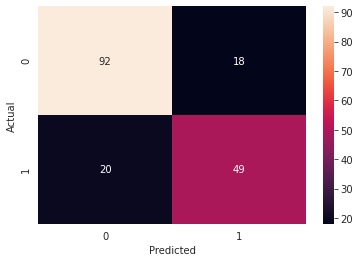

In [28]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
print(cnf_matrix)

#Visualizing Confusion Matrix using HeatMap
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Gaussian Naive Bayes model accuracy(in %): 0.8100558659217877
[[92 18]
 [16 53]]


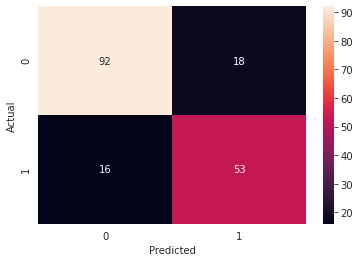

In [29]:
#Using Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

#Visualizing Confusion Matrix using HeatMap
confusion_matrix = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
 

In [30]:
#Using SVM
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Metrics
acc_svm = print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7877094972067039


In [31]:
#Using Decision Tree
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
acc_DT = print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8268156424581006


In [32]:
#Using KNN
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
acc_knn = print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.776536312849162


In [33]:
#Using Random Forest

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
acc_RF = print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8379888268156425


# Comparing Each Model by Accuracy

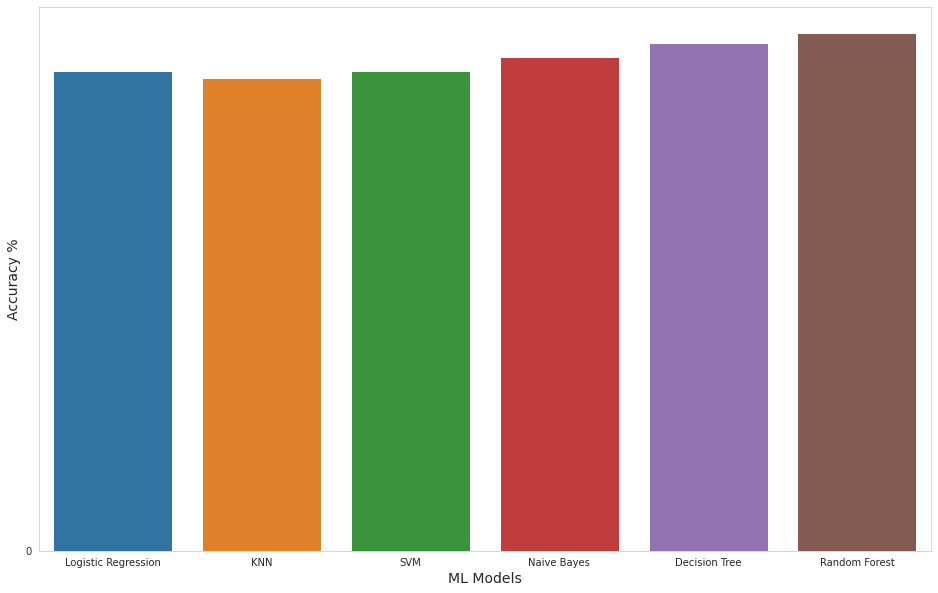

In [34]:
#Random Forest provides better accuracy than other models.
methods = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest"]
accuracy = [0.787, 0.776,0.787,0.81,0.832, 0.849]
sns.set_style("whitegrid")
plt.figure(figsize=(16,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %",fontsize=14)
plt.xlabel("ML Models",fontsize=14)
sns.barplot(x=methods, y=accuracy)
plt.show()

# Testing our Final Testdata using KNN

In [35]:
final_knn = KNeighborsClassifier(n_neighbors=3)
final_knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [36]:
X_test = test_data[['Pclass', 'Sex_Male', 'Age', 'SibSp', 'Parch', 'Embarked_S']].values
y_pred = final_knn.predict(X_test)
score = final_knn.score(X_test,y_pred)
score

1.0

In [37]:
result_submit = pd.DataFrame({'PassengerId': test_data.index, 'Survived': y_pred})
display(result_submit.head())
result_submit.to_csv("/kaggle/working/submission.csv", header=True, index=False)

,PassengerId,Survived
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1
